# Quick note

The final dataset contains 76 columns, while the dataset transformed using dummy variables consists of 258 columns. I didn't want the user to input values for all 258 columns, as I believe this would not only be impractical but also significantly increase the chances of errors. Therefore, I created a *.py* file called `converter.py` with function called *dummies_converter* that transforms the user's input into dummy variables and reshapes it into an appropriate format. Specifically, it converts the user's input of 76 values into an output containing 257 values (one value is missing because the *'SalePrice'* column was excluded to ensure the function's result is immediately ready for price predictions).

The project is organized into sections: default, cross-validation, scaled default, scaled cross-validation and mean error. The goal of this structure is to improve the organization of the project and to facilitate comparisons between all types of models.

**The project follows the following format:** 

* The cell in which the operation was performed

* The result of that operation

* A textual explanation detailing what was done in the cell, the conclusion, the idea, and similar information.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\jovan\\Desktop\\HouseProject\\House_Price_Prediction_-_Classification'

# Importing data

In [3]:
df = pd.read_csv('C:\\Users\\jovan\\Desktop\\HouseProject\\House_Price_Prediction_-_Classification\\Data\\Housing_Data_Final.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [4]:
df

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,526301100,20,141.000000,31770,6,5,1960,1960,112.0,639.0,...,0,0,0,0,1,0,0,0,1,0
1,526350040,20,80.000000,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
2,526351010,20,81.000000,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
3,526353030,20,93.000000,11160,7,5,1968,1968,0.0,1065.0,...,0,0,0,0,1,0,0,0,1,0
4,527105010,60,74.000000,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,923275080,80,37.000000,7937,6,6,1984,1984,0.0,819.0,...,0,0,0,0,1,0,0,0,1,0
2922,923276100,20,75.144444,8885,5,5,1983,1983,0.0,301.0,...,0,0,0,0,1,0,0,0,1,0
2923,923400125,85,62.000000,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,0,1,0,0,0,1,0
2924,924100070,20,77.000000,10010,5,5,1974,1975,0.0,1071.0,...,0,0,0,0,1,0,0,0,1,0


# Train_test split

In [68]:
X = df.drop('MS SubClass', axis = 1)

In [67]:
y = df['MS SubClass']

#####  `y` will be *'SalePrice'*

In [7]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Functions

In [97]:
def accuracy_function(model, preds):
    print(classification_report(y_test, preds, zero_division = 0))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

**This function displays confusion matrix and print classification report.**

-----

In [98]:
def function_model(model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy_function(model, preds)

**This function fits the model, pulls the predictions from it and calls accuracy_function.**

-----

# Default models

**LOGISTIC REGRESSION**

In [9]:
from sklearn.linear_model import LogisticRegression

In [70]:
logistic_model = LogisticRegression(max_iter = 1000)

In [72]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [73]:
preds = logistic_model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [74]:
print(classification_report(y_test, preds, zero_division = 0))

              precision    recall  f1-score   support

          20       0.37      0.79      0.50       266
          30       0.00      0.00      0.00        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.22      0.16      0.19        81
          60       0.45      0.30      0.36       161
          70       0.00      0.00      0.00        28
          75       0.00      0.00      0.00         5
          80       0.00      0.00      0.00        27
          85       0.00      0.00      0.00         8
          90       0.00      0.00      0.00        25
         120       0.00      0.00      0.00        38
         150       0.00      0.00      0.00         1
         160       0.00      0.00      0.00        36
         180       0.00      0.00      0.00         4
         190       0.00      0.00      0.00        15

    accuracy                           0.37       732
   macro avg       0.07   

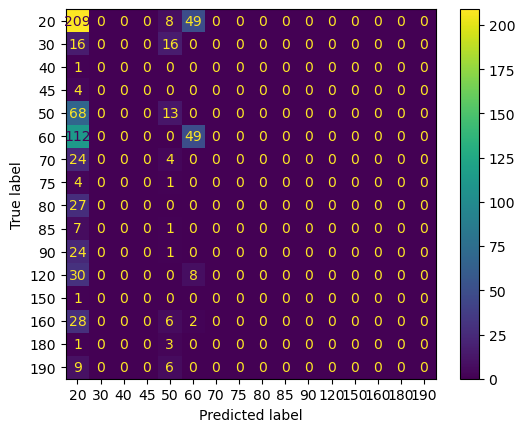

In [75]:
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test)

**SUPPORT VECTOR MACHINES**

In [91]:
from sklearn.svm import SVC

In [92]:
svc_model = SVC()

              precision    recall  f1-score   support

          20       0.36      1.00      0.53       266
          30       0.00      0.00      0.00        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.00      0.00      0.00        81
          60       0.00      0.00      0.00       161
          70       0.00      0.00      0.00        28
          75       0.00      0.00      0.00         5
          80       0.00      0.00      0.00        27
          85       0.00      0.00      0.00         8
          90       0.00      0.00      0.00        25
         120       0.00      0.00      0.00        38
         150       0.00      0.00      0.00         1
         160       0.00      0.00      0.00        36
         180       0.00      0.00      0.00         4
         190       0.00      0.00      0.00        15

    accuracy                           0.36       732
   macro avg       0.02   

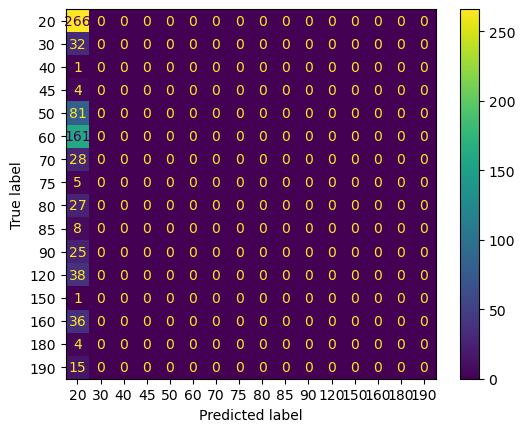

In [96]:
function_model(svc_model)

**KNEAREST NEIGHBORS**

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn_model = KNeighborsClassifier()

              precision    recall  f1-score   support

          20       0.57      0.71      0.64       266
          30       0.36      0.47      0.41        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.46      0.38      0.42        81
          60       0.62      0.58      0.60       161
          70       0.47      0.32      0.38        28
          75       0.00      0.00      0.00         5
          80       0.25      0.11      0.15        27
          85       0.00      0.00      0.00         8
          90       0.44      0.16      0.24        25
         120       0.53      0.71      0.61        38
         150       0.00      0.00      0.00         1
         160       0.79      0.75      0.77        36
         180       0.20      0.25      0.22         4
         190       0.00      0.00      0.00        15

    accuracy                           0.55       732
   macro avg       0.29   

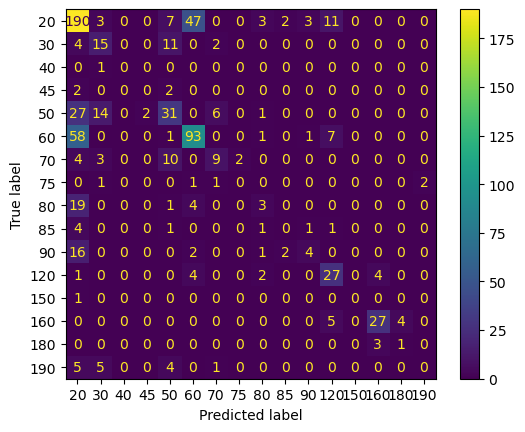

In [101]:
function_model(knn_model)

**DECISION TREES**

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
decision_tree_model = DecisionTreeClassifier()

              precision    recall  f1-score   support

          20       1.00      0.99      0.99       266
          30       0.90      0.88      0.89        32
          40       0.00      0.00      0.00         1
          45       0.67      0.50      0.57         4
          50       0.92      0.99      0.95        81
          60       0.99      0.99      0.99       161
          70       0.96      0.86      0.91        28
          75       1.00      0.60      0.75         5
          80       0.96      0.96      0.96        27
          85       1.00      0.88      0.93         8
          90       0.96      1.00      0.98        25
         120       0.95      1.00      0.97        38
         150       0.00      0.00      0.00         1
         160       1.00      0.97      0.99        36
         180       0.80      1.00      0.89         4
         190       0.88      0.93      0.90        15

    accuracy                           0.97       732
   macro avg       0.81   

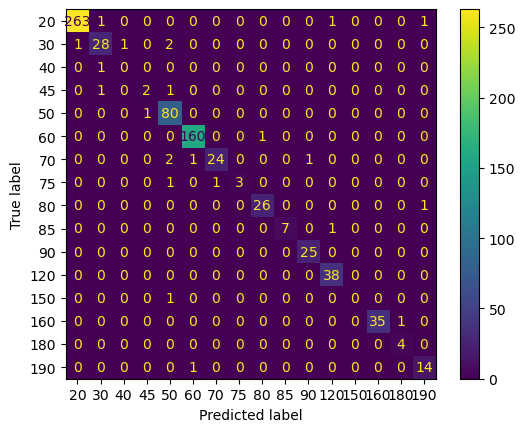

In [107]:
function_model(decision_tree_model)

**RANDOM FORESTS**

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
random_forests_model = RandomForestClassifier()

              precision    recall  f1-score   support

          20       0.98      1.00      0.99       266
          30       0.85      0.91      0.88        32
          40       0.00      0.00      0.00         1
          45       1.00      0.50      0.67         4
          50       0.85      0.98      0.91        81
          60       0.99      0.99      0.99       161
          70       0.90      0.93      0.91        28
          75       0.00      0.00      0.00         5
          80       0.96      1.00      0.98        27
          85       0.78      0.88      0.82         8
          90       1.00      0.92      0.96        25
         120       1.00      1.00      1.00        38
         150       0.00      0.00      0.00         1
         160       0.97      1.00      0.99        36
         180       1.00      1.00      1.00         4
         190       1.00      0.27      0.42        15

    accuracy                           0.96       732
   macro avg       0.77   

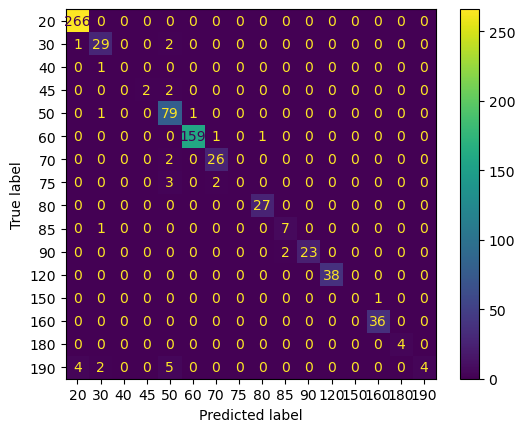

In [104]:
function_model(random_forests_model)

**GRADIENT BOOSTING**

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
gradient_boosting_model = GradientBoostingClassifier()

              precision    recall  f1-score   support

          20       1.00      1.00      1.00       266
          30       0.97      0.94      0.95        32
          40       0.00      0.00      0.00         1
          45       0.60      0.75      0.67         4
          50       0.92      0.99      0.95        81
          60       0.99      0.99      0.99       161
          70       0.96      0.96      0.96        28
          75       1.00      0.40      0.57         5
          80       0.93      1.00      0.96        27
          85       1.00      0.88      0.93         8
          90       1.00      1.00      1.00        25
         120       0.97      1.00      0.99        38
         150       0.00      0.00      0.00         1
         160       1.00      0.97      0.99        36
         180       1.00      0.75      0.86         4
         190       1.00      0.93      0.97        15

    accuracy                           0.98       732
   macro avg       0.83   

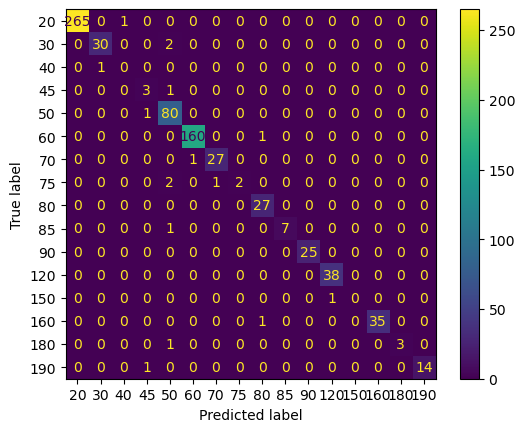

In [110]:
function_model(gradient_boosting_model)

**ADA BOOST**

In [111]:
from sklearn.ensemble import AdaBoostClassifier

In [112]:
ada_boost_model = AdaBoostClassifier()

              precision    recall  f1-score   support

          20       0.79      1.00      0.89       266
          30       0.00      0.00      0.00        32
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         4
          50       0.00      0.00      0.00        81
          60       0.44      1.00      0.61       161
          70       0.00      0.00      0.00        28
          75       0.00      0.00      0.00         5
          80       0.00      0.00      0.00        27
          85       0.00      0.00      0.00         8
          90       1.00      1.00      1.00        25
         120       0.00      0.00      0.00        38
         150       0.00      0.00      0.00         1
         160       0.00      0.00      0.00        36
         180       0.00      0.00      0.00         4
         190       1.00      0.27      0.42        15

    accuracy                           0.62       732
   macro avg       0.20   

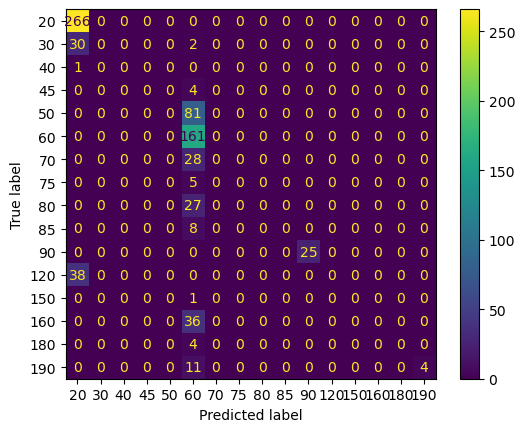

In [113]:
function_model(ada_boost_model)

# Scaled default models